# Previsão de faturamento


 Desafio consiste em realizar uma análise exploratória dos dados e a construção de um modelo de regressão a partir de um levantamento sobre o público alvo de uma empresa alimentícia fictícia do Rio de Janeiro. Foi disponibilizada uma base de dados no formato .csv com as seguintes colunas:

* codigo       - Código do Bairro
* nome         - Nome do Bairro
* cidade       - Cidade
* estado       - Estado
* população    - População Total
* popAte9      - População até 9 anos
* popDe10a14   - População de 10 a 14 anos
* popDe15a19   - População de 15 a 19 anos
* popDe20a24   - População de 20 a 24 anos
* popDe25a34   - População de 25 a 34 anos
* popDe35a49   - População de 35 a 49 anos
* popDe50a59   - População de 50 a 59 anos
* popMaisDe60  - População de 60 anos ou mais
* domiciliosA1 - Quantidade de Domicílios de Renda A1
* domiciliosA2 - Quantidade de Domicílios de Renda A2
* domiciliosB1 - Quantidade de Domicílios de Renda B1
* domiciliosB2 - Quantidade de Domicílios de Renda B2
* domiciliosC1 - Quantidade de Domicílios de Renda C1
* domiciliosC2 - Quantidade de Domicílios de Renda C2
* domiciliosD  - Quantidade de Domicílios de Renda D
* domiciliosE  - Quantidade de Domicílios de Renda E
* rendaMedia   - Renda Média por Domicílio
* faturamento  - Faturamento Total no Bairro

O desafio foi dividido em duas partes. Na parte 1 está a parte relacionada com a limpeza, transformação e análise exploratória dos dados. Na parte 2 está a parte relacionada com a construção dos modelos regressores.

Obrigado!



## Parte 1

Passos abordados:

- Importação da Base e Bibliotecas 
- Informações Gerais
- Limpeza
- Análise e Visualização

### Importação das Bibliotecas base e da Base de Dados

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Importação da Base de Dados
base = pd.read_csv('DesafioEstagioMachineLearning.csv')

In [547]:
# Formato da Base de Dados
base.shape

(160, 23)

In [548]:
# Visualização das 5 primeiras linhas
base.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,...,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,...,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,...,0,96,404,652,644,522,77,254,2391.0,874200.0
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,...,114,178,393,517,945,584,137,286,3727.0,912226.0
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,...,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0


### Informações Gerais Sobre os Dados

In [549]:
# Formato dos dos dados de cada coluna
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        160 non-null    int64  
 1   nome          160 non-null    object 
 2   cidade        160 non-null    object 
 3   estado        160 non-null    object 
 4   população     160 non-null    int64  
 5   popAte9       160 non-null    int64  
 6   popDe10a14    160 non-null    int64  
 7   popDe15a19    160 non-null    int64  
 8   popDe20a24    160 non-null    int64  
 9   popDe25a34    160 non-null    int64  
 10  popDe35a49    160 non-null    int64  
 11  popDe50a59    160 non-null    int64  
 12  popMaisDe60   160 non-null    int64  
 13  domiciliosA1  160 non-null    int64  
 14  domiciliosA2  160 non-null    int64  
 15  domiciliosB1  160 non-null    int64  
 16  domiciliosB2  160 non-null    int64  
 17  domiciliosC1  160 non-null    int64  
 18  domiciliosC2  160 non-null    

In [9]:
# Retirando atributos desnecessários
base.drop(['codigo', 'cidade', 'estado'], axis = 1, inplace=True)

In [551]:
# Estatísticas básicas para cada coluna
base.describe()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,154.000000,1.600000e+02
mean,42654.350000,5329.06250,2484.443750,3272.156250,3349.381250,6584.475000,8826.862500,5332.262500,7475.706250,388.475000,608.268750,1871.562500,2385.075000,3539.850000,3030.806250,568.37500,1821.612500,3608.071429,8.761600e+05
std,64262.949072,10816.19977,4948.827166,5752.156303,5601.893201,9049.895783,11536.276416,7986.261929,10258.307743,1403.605232,1535.237669,2973.530791,2779.071565,4324.539462,4003.047836,823.92034,2292.079295,6091.865305,4.382106e+05
min,173.000000,33.00000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.00000,2.000000,654.000000,2.465100e+04
25%,13362.750000,1512.75000,690.750000,945.000000,994.750000,2131.250000,2900.750000,1598.750000,2118.250000,0.000000,0.000000,391.500000,716.000000,1088.750000,789.750000,117.75000,431.500000,1486.000000,7.112785e+05
50%,26076.000000,3111.50000,1434.000000,2015.000000,2142.500000,4170.500000,5657.000000,3371.500000,4575.500000,0.000000,107.500000,848.000000,1536.000000,2394.500000,1861.500000,327.50000,1042.500000,1915.500000,8.242285e+05
75%,46504.500000,5622.25000,2621.500000,3448.750000,3451.750000,7145.250000,9586.750000,6333.250000,9196.000000,1.000000,430.500000,1962.500000,3065.750000,4203.000000,3652.500000,694.00000,2138.250000,2954.500000,9.343208e+05
max,667603.000000,122578.00000,55935.000000,62342.000000,60567.000000,86116.000000,105316.000000,83341.000000,91408.000000,13408.000000,11668.000000,19350.000000,21237.000000,33111.000000,25779.000000,4956.00000,14833.000000,63887.000000,2.915612e+06


### Limpeza dos dados

In [552]:
# Procurando por valores faltantes 
base.isnull().sum()

nome            0
população       0
popAte9         0
popDe10a14      0
popDe15a19      0
popDe20a24      0
popDe25a34      0
popDe35a49      0
popDe50a59      0
popMaisDe60     0
domiciliosA1    0
domiciliosA2    0
domiciliosB1    0
domiciliosB2    0
domiciliosC1    0
domiciliosC2    0
domiciliosD     0
domiciliosE     0
rendaMedia      6
faturamento     0
dtype: int64

#### Tratamento dos valores nulos

Existem várias abordagens do que fazer quando existem valores nulos na Base de Dados. Cada uma delas é usada de acordo com um caso específico e não existe uma "verdade universal" em relação ao que fazer para contornar esses problemas. Neste caso, optei por substituir os valores nulos da coluna "rendaMedia" pela média dos valores dessa coluna. Outras opções seriam excluir os registros correspondentes, substituir pela mediana, ou imputar os valores através de algum algoritmo de Machine Learning. 

In [10]:
# Preenchendo os valores nulos com a média da coluna
base.loc[(base['rendaMedia'].isnull() == True), 'rendaMedia'] = base['rendaMedia'].mean()

In [554]:
# Verificando os valores nulos novamente
base.isnull().sum()

nome            0
população       0
popAte9         0
popDe10a14      0
popDe15a19      0
popDe20a24      0
popDe25a34      0
popDe35a49      0
popDe50a59      0
popMaisDe60     0
domiciliosA1    0
domiciliosA2    0
domiciliosB1    0
domiciliosB2    0
domiciliosC1    0
domiciliosC2    0
domiciliosD     0
domiciliosE     0
rendaMedia      0
faturamento     0
dtype: int64

#### Outliers

É sempre importante buscar por  pontos que se econtrem muito distantes dos demais e que possam se enquadrar como outliers. Esses valores podem ser informações reais ou podem ser erros de preenchimento. Assim como no caso dos valores nulos, cabe que a decisão seja tomada de acordo com cada situação, sendo que os valores podem ser retirados ou corrigidos. Neste caso, os dados considerados como outliers serão desconsiderados pois podem atrapalhar na construção do futuro modelo regressor. 

Existem inúmeros modos estatísticos para encontrar outliers. Aqui, o utilizado foi o método com o cálculo do  Z-score onde são levados em conta o desvio padrão e a média dos dados. Os dados são reescalonados e é encontrada a distribuição com média 0 e desvio padrão 1. Os dados que se encontrarem muito longe do 0, são considerados outliers.

In [11]:
# Nome retirado para o cálculo
base.drop(['nome'], axis = 1, inplace=True)
# Cálculo do Z-Score
from scipy import stats
z = np.abs(stats.zscore(base))
print(z)
z.shape

[[0.48356968 0.39899132 0.40569769 ... 0.66419054 0.18584018 0.1290064 ]
 [0.23555921 0.01836915 0.06008989 ... 0.29952554 0.44939056 0.65774105]
 [0.525295   0.41234648 0.4227247  ... 0.68607329 0.2043055  0.00448671]
 ...
 [0.14773778 0.20061149 0.17542763 ... 0.45936805 0.07034805 0.57431229]
 [0.52741795 0.42709281 0.42515713 ... 0.70357948 0.1997731  0.1046496 ]
 [0.63348738 0.47800937 0.48860302 ... 0.77666785 0.03070758 0.09910065]]


(160, 19)

In [12]:
# Mantendo somente os valores com z menor que 3
base = base[(z < 3).all(axis=1)]

In [557]:
# Novo tamanho da base
base.shape

(148, 19)

In [558]:
# Nova descrição da base
base.describe()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,1.480000e+02
mean,31015.959459,3685.912162,1742.716216,2345.736486,2402.641892,4857.459459,6603.250000,3885.256757,5492.986486,177.209459,364.344595,1348.756757,1869.385135,2768.439189,2357.324324,433.554054,1435.391892,3024.354247,8.531321e+05
std,24535.117537,3351.590882,1568.092663,2046.227398,1984.665077,3878.328533,5249.929755,3030.509432,4449.552348,580.526389,722.293745,1582.701499,1521.370773,2258.904455,2174.022292,454.197510,1437.362620,3279.046060,3.111745e+05
min,173.000000,33.000000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,2.000000,654.000000,5.927300e+04
25%,12898.500000,1365.750000,666.250000,903.250000,945.750000,2029.250000,2738.500000,1547.500000,2084.750000,0.000000,0.000000,364.250000,680.000000,1043.750000,768.500000,116.750000,415.500000,1492.000000,7.220752e+05
50%,25460.000000,2961.500000,1350.500000,1850.000000,1939.000000,3966.500000,5466.000000,3230.000000,4359.000000,0.000000,94.000000,770.500000,1431.500000,2231.000000,1775.500000,304.500000,982.500000,1943.500000,8.242285e+05
75%,43090.500000,4794.000000,2260.750000,3110.500000,3246.000000,6698.500000,9363.750000,5728.750000,7994.500000,0.000000,336.000000,1767.250000,2563.500000,3863.750000,3435.250000,611.250000,1905.750000,2986.750000,9.321340e+05
max,112994.000000,18088.000000,8474.000000,10307.000000,9069.000000,18732.000000,25269.000000,14384.000000,22046.000000,4213.000000,4307.000000,7949.000000,8325.000000,10129.000000,11066.000000,2289.000000,7987.000000,17984.000000,1.981817e+06


### Análise e Visualização dos Dados

#### Visualização de histogramas para os atributos

A fim de ter uma idea da distribuição de frequência dos atributos, os histogramas abaixo foram gerados

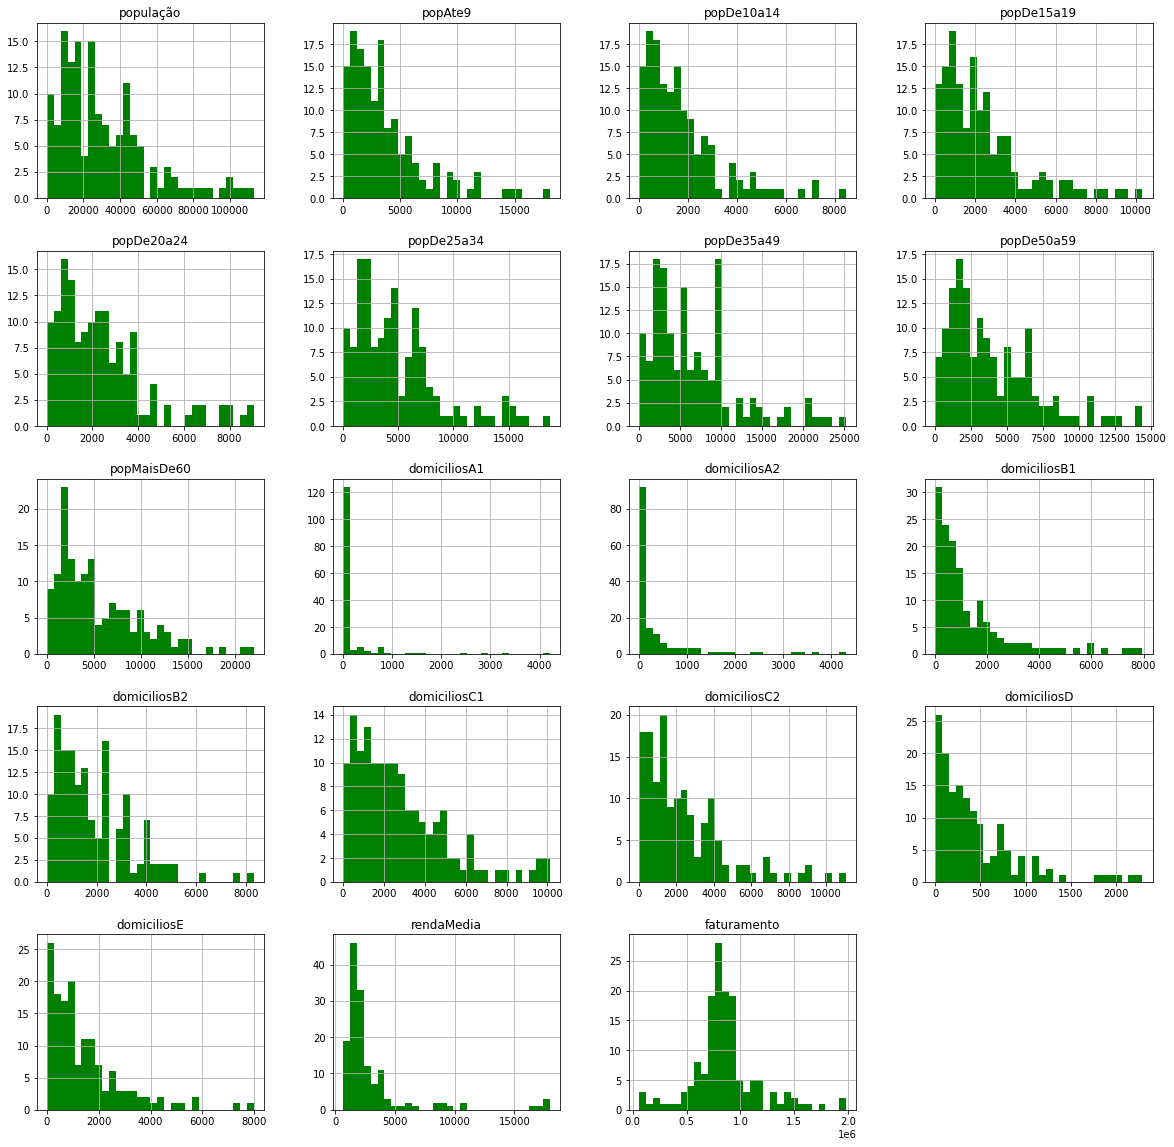

In [559]:
# Histograma para os atributos
base.hist(bins = 30, figsize=(20,20), color = 'g');

#### Divisão em sub-grupos de acordo com o faturamento

Para visualizar melhor o comportamento dos atributos em locais onde o faturamento da empresa foi alto, preferi dividir a Base de Dados em dois grupos:

* Grupo1: Sub-Grupo onde os valores de faturamento são maiores que o terceiro quartil do faturamento
* Grupo2: Sub-Grupo onde os valores de faturamento são menores que o terceiro quartil do faturamento

Assim, o grupo1 possui faturamento alto e o grupo2 possui faturamento mais baixo. 

In [560]:
# Terceiro Quartil
q3 = np.quantile(base['faturamento'], .75)
q3

932134.0

In [561]:
# Divisão dos subgrupos
grupo1 = base[base['faturamento']>=q3]
grupo2 = base[base['faturamento']<q3]

In [562]:
# Quantidade por grupo
print("Total: ", len(base))
print("Bairros com alto faturamento: ", len(grupo1))
print("Bairros com baixo faturamento: ", len(grupo2))

Total:  148
Bairros com alto faturamento:  37
Bairros com baixo faturamento:  111


#### Estatísticas de cada sub - grupo

Fazendo essa divisão entre os subgrupos baseados no faturamento, logo de cara já possível obter algumas informações interessantes.

O número médio de domicílios de renda A1, A2, B1 e B2 é bem maior no grupo 1, onde o faturamento da empresa é maior. Isso também é observável na Renda Média, com o grupo 1 tendo um valor médio muito maior.

Além disso, a população do grupo 1 possui uma média de idade maior que a do grupo 2, um possível indicativo de que a empresa tem um melhor faturamento onde existem mais moradores com idade acima de 35 anos (público alvo da empresa se econtra em pessoas com idades mais avançadas). Essa diferença da média de idade estava ainda mais gritante nos dados originais, porém os valores altos foram considerados como outliers para a modelagem do algoritmo de previsão. 

In [563]:
# Estatísticas grupo 1
grupo1.describe()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,3.700000e+01
mean,32821.810811,2953.027027,1406.675676,2015.351351,2226.837838,4965.621622,7028.756757,4673.189189,7552.351351,687.432432,1179.027027,2989.216216,2460.486486,2453.783784,1520.702703,242.432432,880.513514,6654.005792,1.238805e+06
std,27128.419812,2851.722087,1348.461326,1908.104618,1965.552078,4204.229486,5922.548384,3719.166079,5833.342120,1006.663508,1080.009246,2228.187182,1995.024333,2348.760786,1707.493580,315.611711,894.176518,4943.844513,2.831793e+05
min,842.000000,61.000000,29.000000,35.000000,46.000000,125.000000,192.000000,72.000000,34.000000,0.000000,59.000000,57.000000,33.000000,7.000000,3.000000,0.000000,2.000000,2038.000000,9.325150e+05
25%,13009.000000,1027.000000,500.000000,688.000000,800.000000,1900.000000,2707.000000,1837.000000,2919.000000,0.000000,330.000000,1278.000000,1009.000000,815.000000,457.000000,39.000000,212.000000,3089.000000,1.014058e+06
50%,25341.000000,2152.000000,1039.000000,1456.000000,1804.000000,3883.000000,5542.000000,3910.000000,6360.000000,291.000000,899.000000,2449.000000,2202.000000,1956.000000,1155.000000,118.000000,557.000000,4283.000000,1.162364e+06
75%,43591.000000,3528.000000,1675.000000,2340.000000,2753.000000,5993.000000,8665.000000,6261.000000,9966.000000,809.000000,1516.000000,4478.000000,3321.000000,3029.000000,1570.000000,287.000000,1249.000000,8861.000000,1.409134e+06
max,105009.000000,11084.000000,5474.000000,7981.000000,8028.000000,16085.000000,23292.000000,14384.000000,22046.000000,4213.000000,4307.000000,7949.000000,8325.000000,10129.000000,6948.000000,1222.000000,3111.000000,17984.000000,1.981817e+06


In [564]:
# Estatísticas grupo 2
grupo2.describe()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,30414.009009,3930.207207,1854.729730,2455.864865,2461.243243,4821.405405,6461.414414,3622.612613,4806.531532,7.135135,92.783784,801.936937,1672.351351,2873.324324,2636.198198,497.261261,1620.351351,1814.470399,724574.441441
std,23709.369111,3479.829283,1624.888919,2086.841504,1996.384610,3782.968700,5027.099403,2732.729402,3663.277613,44.354663,133.385729,718.154393,1278.209491,2229.155316,2246.790482,476.134162,1536.615411,679.116259,190908.419463
min,173.000000,33.000000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,17.000000,8.000000,16.000000,654.000000,59273.000000
25%,12887.000000,1517.500000,738.000000,962.500000,1019.000000,2098.500000,2789.000000,1503.500000,1986.000000,0.000000,0.000000,255.500000,639.500000,1202.000000,1022.000000,169.500000,545.000000,1377.000000,686343.500000
50%,25549.000000,3177.000000,1460.000000,1999.000000,1993.000000,4000.000000,5406.000000,2920.000000,3777.000000,0.000000,49.000000,588.000000,1379.000000,2456.000000,2199.000000,380.000000,1154.000000,1679.000000,779768.000000
75%,42814.500000,5340.000000,2423.500000,3294.000000,3354.500000,6743.500000,9365.500000,5511.000000,7278.000000,0.000000,116.000000,1064.000000,2413.000000,4120.000000,3677.000000,665.000000,2059.000000,2050.500000,846338.500000
max,112994.000000,18088.000000,8474.000000,10307.000000,9069.000000,18732.000000,25269.000000,12713.000000,15323.000000,429.000000,572.000000,3359.000000,5061.000000,10037.000000,11066.000000,2289.000000,7987.000000,4313.000000,932007.000000


#### Análise gráfica entre dois atributos simultâneos

Essa análise é interessante pois pode mostrar se existe alguma relação linear entre os atributos . Posteriormente, outra informação útil que será calculada é a correlação entre os atributos.

O gráfico mostra os pontos com a interseção entre os atributos x e y (com um gráfico do tipo dispersão ou "scatter plot") e também estima uma reta de regressão a partir dos dados. Fica fácil observar se existe alguma relação linear nos dados a partir dessa reta. A reta crescente mostra que os atributos podem ser estimados como grandezas diretamente proporcionais (quando um cresce, o outro também cresce). 


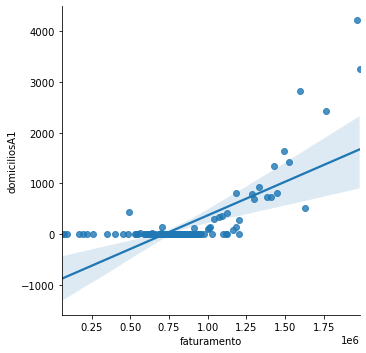

In [565]:
# Seleção dos atributos para plotar (faturamento e domicilios A1)
sns.lmplot(x='faturamento', y='domiciliosA1', data=base) 
plt.show()

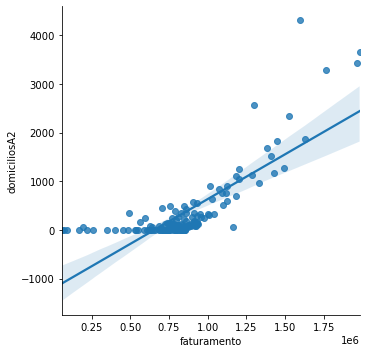

In [566]:
# Seleção dos atributos para plotar (faturamento e domicilios A2)
sns.lmplot(x='faturamento', y='domiciliosA2', data=base) 
plt.show()

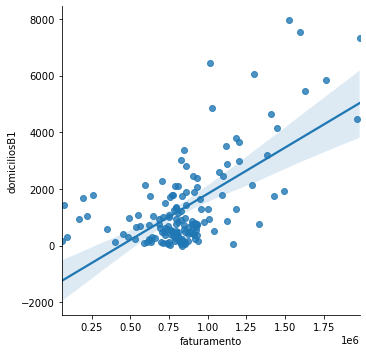

In [567]:
# Seleção dos atributos para plotar (faturamento e domicilios B1)
sns.lmplot(x='faturamento', y='domiciliosB1', data=base) 
plt.show()

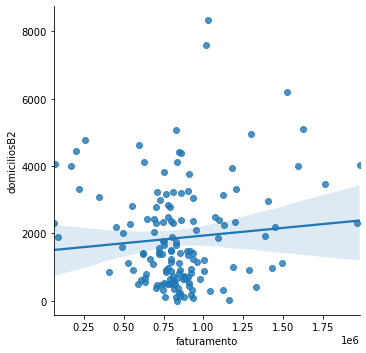

In [568]:
# Seleção dos atributos para plotar (faturamento e domicilios B2)
sns.lmplot(x='faturamento', y='domiciliosB2', data=base) 
plt.show()

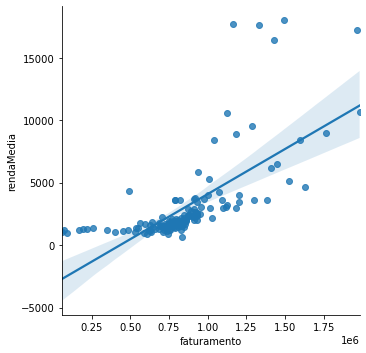

In [569]:
# Seleção dos atributos para plotar (faturamento e rendamedia)
sns.lmplot(x='faturamento', y='rendaMedia', data=base) 
plt.show()

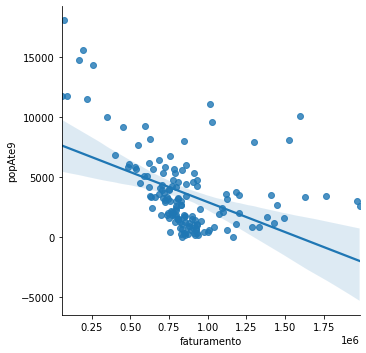

In [570]:
# Seleção dos atributos para plotar (faturamento e População até 9 anos)
sns.lmplot(x='faturamento', y='popAte9', data=base) 
plt.show()

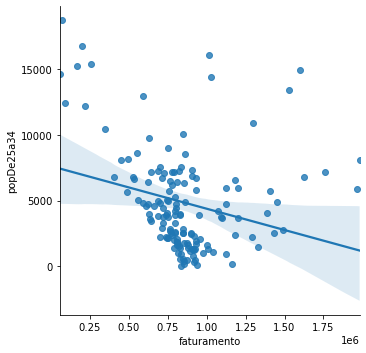

In [571]:
# Seleção dos atributos para plotar (faturamento e População de 25 a 34 anos)
sns.lmplot(x='faturamento', y='popDe25a34', data=base) 
plt.show()

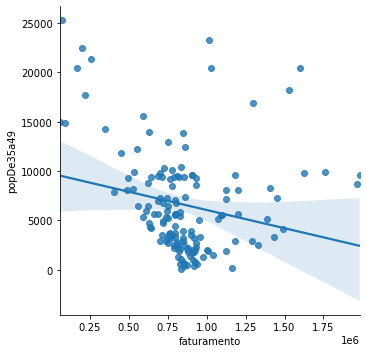

In [572]:
# Seleção dos atributos para plotar (faturamento e População de 35 a 49 anos)
sns.lmplot(x='faturamento', y='popDe35a49', data=base) 
plt.show()

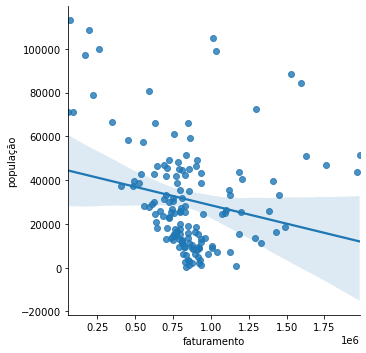

In [573]:
# Seleção dos atributos para plotar (faturamento e População )
sns.lmplot(x='faturamento', y='população', data=base) 
plt.show()

#### Correlação entre os atributos

Um outro teste estatístico que deve ser levado em conta é a correlação. De forma parecida com os gráficos acima, seu valor mostra a relação estatística entre duas variáveis. Aqui, será calculada a correlação de Pearson, onde o intervalo possível vai de -1 a +1. Quanto mais positiva a correlação mais diretamente proporcional a relação entre as duas variáveis. Quanto mais negativa, mais inversamente proporcional. Uma correlação de 0 mostra inexistência de relação entre as duas. 

Os resultados abaixo, tanto do heatmap quanto dos valores rankeados mostram informações interessante, mas que de certo modo já eram esperadas, pois já haviam sido deduzidas após a análise estatística dos sub-grupos. As 5 maiores correlações existentes com o faturamento são:

* Domicilios de Renda A2     - positivo
* Domicilios de Renda A1     - positivo
* Renda Média                - positivo
* Domicilios de Renda B1     - positivo
* População acima de 60 anos - positivo

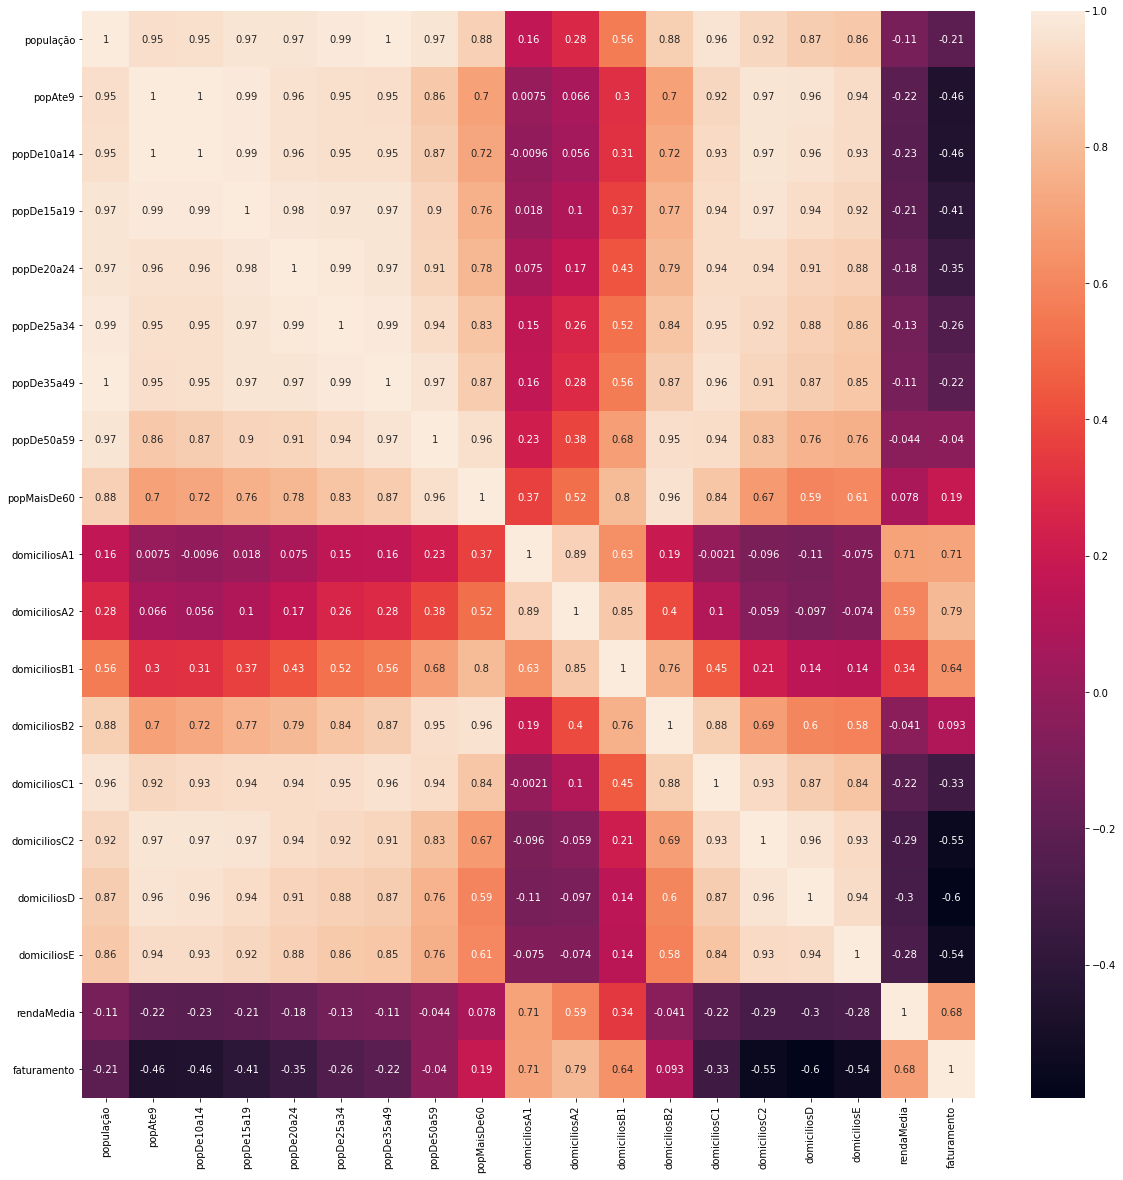

In [574]:
# Correlações
cor = base.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(cor, annot = True);

In [575]:
# Correlação rankeada
cor = base.corr()['faturamento'].sort_values()
cor

domiciliosD    -0.595379
domiciliosC2   -0.554283
domiciliosE    -0.541966
popAte9        -0.464217
popDe10a14     -0.455378
popDe15a19     -0.408107
popDe20a24     -0.346553
domiciliosC1   -0.333266
popDe25a34     -0.260565
popDe35a49     -0.219110
população      -0.213563
popDe50a59     -0.039914
domiciliosB2    0.093030
popMaisDe60     0.187625
domiciliosB1    0.641160
rendaMedia      0.684846
domiciliosA1    0.709759
domiciliosA2    0.793132
faturamento     1.000000
Name: faturamento, dtype: float64

#### Pandas Profiling

Uma outra alternativa que poderia ter sido usada era a ferramenta Pandas Profiling que gera um relatório estatístico em HTML que pode fornecer algumas informações úteis. Preferi fazer manualmente pois achei que a apresentação dos resultados ficaria melhor. Além disso, o carregamento do relatório no notebook pode deixá-lo lento. Abaixo um exemplo de como usá-lo:

* from pandas_profiling import ProfileReport
* profile = ProfileReport(base, title='Relatório Estatístico',html={'style':{'full_width':True}})



****

## Parte 2

Nessa parte do desafio, preferi utilizar diferentes algoritmos de regressão e comparar os melhores resultados. Serão utilizados:
 
* Random Forest
* Gradient Boosting Regressor
* Adaboost Regressor
* XGBoost



Os algoritmos serão comparados pelo valor do RMSE (Root Mean Squared Error) e da acurácia com a qual o modelo se ajustou aos dados de teste, que foi calculado pelo parâmetros r2 (r-squared). É importante levar em conta que quanto mais próxima de 1 estiver a acurácia (no caso, o r2), melhor o modelo. Ao contrátio, o erro deve ser minimizado. 

Para todos os algoritmos, duas abordagens serão realizadas. Na primeira parte, a base será dividida em treino e teste. Na segunda, o método utilizado será o Cross - Validation, onde serão realizadas várias divisões de treino e teste diferentes na base de dados. Desse modo, o algoritmo usa como treino e teste, toda a base de dados, sendo que em cada iteração K, uma divisão é feita.

Porém para cada uma das abordagens, existem algumas versões diferentes. Chamei de Modelo 1 o modelo que utiliza todas as variáveis e de Modelo 2, o modelo que usa a redução de dimensionalidade com  o PCA (De 18 atributos para 9).

Ao final dessa primeira análise inicial, o melhor modelo será escolhido para que se possa fazer uma análise mais profunda de seus parâmetros para que se melhore ainda mais o resultado. 

### Random Forest 



#### Divisão em treino e teste

##### Modelo 1

In [576]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [577]:
# Divisão entre treino (80% da base) e teste (20% da base)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2)

In [578]:
# Visualização da quantidade de cada um
print("Formato da base preditora(treino): ", X_treino.shape)
print("Formato da base com o alvo(treino): ", y_treino.shape)
print("Formato da base preditora(teste): ", X_teste.shape)
print("Formato da base com o alvo(teste): ", y_teste.shape)

Formato da base preditora(treino):  (118, 18)
Formato da base com o alvo(treino):  (118,)
Formato da base preditora(teste):  (30, 18)
Formato da base com o alvo(teste):  (30,)


In [579]:
# Criação do modelo
from sklearn.ensemble import RandomForestRegressor
modelo1 = RandomForestRegressor(n_estimators = 50)

In [580]:
# Ajuste aos dados de treino (parâmetros padrões -> 100 árvores)
modelo1.fit(X_treino, y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [581]:
# Previsão com os dados de teste
y_pred = modelo1.predict(X_teste)
y_pred

array([ 900727.5 ,  784554.02,  883617.24,  918564.72,  939101.02,
        180088.64,  629358.2 , 1097530.9 ,  749226.88,  752742.84,
        890093.76,  762723.46,  768537.58,  540794.08,  778238.24,
        755002.76,  995701.02,  798437.1 ,  774676.6 ,  832599.3 ,
        784820.56,  911053.36,  787128.22,  656765.7 ,  915742.08,
        864691.68,  911197.4 , 1199630.8 , 1362701.52,  825706.04])

In [582]:
# Criação de um dataframe para comparação dos valores
comp = pd.DataFrame({"Real":y_teste, "Previsto":y_pred})

In [583]:
# Visualização dos valores
comp

,Real,Previsto
92,905395.0,900727.50
130,752007.0,784554.02
158,921875.0,883617.24
38,1041359.0,918564.72
48,932007.0,939101.02
103,258464.0,180088.64
4,553020.0,629358.20
6,1092081.0,1097530.90
85,835847.0,749226.88
41,748387.0,752742.84


In [584]:
# Quão bem o modelo se ajustou às variáveis de treino
modelo1.score(X_treino, y_treino)

0.9877641250513928

In [585]:
# Quão bem o modelo se ajustou às variáveis de teste
modelo1.score(X_teste,y_teste)

0.8479060370898088

In [586]:
# RMSE do modelo
from sklearn import metrics
mse = metrics.mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  102100.70618911448


In [587]:
rf1 = pd.DataFrame({'Algoritmo': 'Random Forest', 'RMSE':rmse, 'Acc': modelo1.score(X_teste, y_teste)}, index = {'1'})

##### Modelo 2

In [588]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [589]:
# Redução de dimensionalidade com o PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
X = pca.fit_transform(X)

In [590]:
# Divisão entre treino (80% da base) e teste (20% da base)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2)

In [591]:
# Visualização da quantidade de cada um
print("Formato da base preditora(treino): ", X_treino.shape)
print("Formato da base com o alvo(treino): ", y_treino.shape)
print("Formato da base preditora(teste): ", X_teste.shape)
print("Formato da base com o alvo(teste): ", y_teste.shape)

Formato da base preditora(treino):  (118, 9)
Formato da base com o alvo(treino):  (118,)
Formato da base preditora(teste):  (30, 9)
Formato da base com o alvo(teste):  (30,)


In [592]:
# Ajuste aos dados de treino (parâmetros padrões -> 100 árvores)
modelo2 = RandomForestRegressor(n_estimators = 50)
modelo2.fit(X_treino, y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [593]:
# Previsão com os dados de teste
y_pred = modelo2.predict(X_teste)
y_pred

array([ 735636.92,  706630.78,  631926.34, 1694451.1 ,  767718.74,
       1173145.68,  898859.68,  769581.22,  704592.54,  740195.66,
        914881.54, 1440672.08,  685293.58,  759577.68,  744985.76,
        688236.28,  915292.42,  846045.62,  260743.7 ,  849906.18,
        775173.22,  194044.4 ,  900289.34,  814731.42, 1029803.74,
        922248.22,  804540.32,  806213.06,  550487.12,  878439.28])

In [594]:
# Criação de um dataframe para comparação dos valores
comp = pd.DataFrame({"Real":y_teste, "Previsto":y_pred})
comp

,Real,Previsto
37,645088.0,735636.92
121,720444.0,706630.78
4,553020.0,631926.34
50,1981817.0,1694451.10
124,710341.0,767718.74
69,1030856.0,1173145.68
32,912281.0,898859.68
101,744303.0,769581.22
12,662520.0,704592.54
41,748387.0,740195.66


In [595]:
# RMSE do modelo
from sklearn import metrics
mse = metrics.mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  92118.56217018724


In [596]:
rf2 = pd.DataFrame({'Algoritmo': 'Random Forest (PCA)', 'RMSE':rmse, 'Acc': modelo2.score(X_teste, y_teste)}, index = {'2'})
resultados = pd.concat([rf1, rf2])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805


#### Cross Validation

##### Modelo 1

In [597]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [598]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [599]:
modelo1 = RandomForestRegressor(n_estimators = 500)

In [600]:
# Avaliando o modelo
from sklearn.model_selection import cross_validate
scoring = {'Error':'neg_root_mean_squared_error' ,'Accuracy':'r2'}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores1 = cross_val_score(modelo1, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_validate(modelo1, X,y, scoring = scoring, cv = cv)

In [601]:
rf1_k = pd.DataFrame({'Algoritmo': 'Random Forest (K-Fold)', 'RMSE':abs(np.mean(n_scores['test_Error'])), 'Acc': np.mean(n_scores['test_Accuracy'])}, index = {'3'})
resultados = pd.concat([resultados, rf1_k])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805
3,Random Forest (K-Fold),86986.410574,0.894496


##### Modelo 2

In [602]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [603]:
# Redução de dimensionalidade com o PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
X = pca.fit_transform(X)

In [604]:
modelo2 = RandomForestRegressor(n_estimators = 500)

In [605]:
# Avaliando o modelo
from sklearn.model_selection import cross_validate
scoring = {'Error':'neg_root_mean_squared_error' ,'Accuracy':'r2'}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores1 = cross_val_score(modelo1, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_validate(modelo2, X,y, scoring = scoring, cv = cv)

In [606]:
rf2_k = pd.DataFrame({'Algoritmo': 'Random Forest (K-Fold/PCA)', 'RMSE':abs(np.mean(n_scores['test_Error'])), 'Acc': np.mean(n_scores['test_Accuracy'])}, index = {'4'})
resultados = pd.concat([resultados, rf2_k])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805
3,Random Forest (K-Fold),86986.410574,0.894496
4,Random Forest (K-Fold/PCA),80818.392238,0.905688


### Gradient Boosting Regressor

#### Divisão em treino e teste

##### Modelo 1

In [607]:
from sklearn.ensemble import GradientBoostingRegressor

In [608]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [609]:
# Divisão entre treino (80% da base) e teste (20% da base)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2)

In [610]:
# Criação do modelo e ajuste aos dados
modelo1 = GradientBoostingRegressor()
modelo1.fit(X_treino, y_treino)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [611]:
# Previsão
y_pred = modelo1.predict(X_teste)

In [612]:
modelo1.score(X_treino, y_treino)

0.9993312572035885

In [613]:
modelo1.score(X_teste, y_teste)

0.9724398407598422

In [614]:
# Criação de um dataframe para comparação dos valores
comp = pd.DataFrame({"Real":y_teste, "Previsto":y_pred})
comp

,Real,Previsto
74,795412.0,7.787396e+05
100,630075.0,6.654291e+05
3,912226.0,8.970469e+05
35,88790.0,1.878103e+05
37,645088.0,6.122494e+05
103,258464.0,3.834564e+05
106,593191.0,6.305561e+05
19,635348.0,6.856672e+05
94,978197.0,9.221075e+05
40,607957.0,6.435542e+05


In [615]:
# RMSE do modelo
from sklearn import metrics
mse = metrics.mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  57218.90624433535


In [616]:
GB = pd.DataFrame({'Algoritmo': 'Gradient Boosting', 'RMSE':rmse, 'Acc': modelo1.score(X_teste, y_teste)}, index = {'5'})
resultados = pd.concat([resultados, GB])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805
3,Random Forest (K-Fold),86986.410574,0.894496
4,Random Forest (K-Fold/PCA),80818.392238,0.905688
5,Gradient Boosting,57218.906244,0.972440


##### Modelo 2

In [617]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [618]:
# Redução de dimensionalidade com o PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
X = pca.fit_transform(X)

In [619]:
# Divisão entre treino (80% da base) e teste (20% da base)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2)

In [620]:
# Criação do modelo e ajuste aos dados
modelo2 = GradientBoostingRegressor()
modelo2.fit(X_treino, y_treino)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [621]:
# Previsão
y_pred = modelo2.predict(X_teste)

In [622]:
modelo2.score(X_treino, y_treino)

0.9996320158868359

In [623]:
modelo2.score(X_teste, y_teste)

0.949746204460191

In [624]:
# Criação de um dataframe para comparação dos valores
comp = pd.DataFrame({"Real":y_teste, "Previsto":y_pred})
comp

,Real,Previsto
124,710341.0,7.070476e+05
42,846146.0,8.261227e+05
110,810599.0,8.147736e+05
91,726430.0,7.476005e+05
61,779768.0,7.483016e+05
60,835491.0,7.792925e+05
118,1596252.0,1.465142e+06
86,754735.0,7.512559e+05
140,752629.0,7.357194e+05
6,1092081.0,9.510199e+05


In [625]:
# RMSE do modelo
from sklearn import metrics
mse = metrics.mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  64022.25218681822


In [626]:
GB_PCA = pd.DataFrame({'Algoritmo': 'Gradient Boosting (PCA)', 'RMSE':rmse, 'Acc':modelo2.score(X_teste, y_teste) }, index = {'6'})
resultados = pd.concat([resultados, GB_PCA])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805
3,Random Forest (K-Fold),86986.410574,0.894496
4,Random Forest (K-Fold/PCA),80818.392238,0.905688
5,Gradient Boosting,57218.906244,0.972440
6,Gradient Boosting (PCA),64022.252187,0.949746


#### Cross-Validation

##### Modelo 1

In [627]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [628]:
modelo1 = GradientBoostingRegressor()

In [629]:
# Avaliando o modelo
from sklearn.model_selection import cross_validate
scoring = {'Error':'neg_root_mean_squared_error' ,'Accuracy':'r2'}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores1 = cross_val_score(modelo1, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_validate(modelo1, X,y, scoring = scoring, cv = cv)

In [630]:
GB_KFOLD = pd.DataFrame({'Algoritmo': 'Gradient Boosting (K-Fold)', 'RMSE':abs(np.mean(n_scores['test_Error'])), 'Acc': np.mean(n_scores['test_Accuracy'])}, index = {'7'})
resultados = pd.concat([resultados, GB_KFOLD])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805
3,Random Forest (K-Fold),86986.410574,0.894496
4,Random Forest (K-Fold/PCA),80818.392238,0.905688
5,Gradient Boosting,57218.906244,0.972440
6,Gradient Boosting (PCA),64022.252187,0.949746
7,Gradient Boosting (K-Fold),73373.646545,0.926522


##### Modelo 2

In [631]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [632]:
# Redução de dimensionalidade com o PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
X = pca.fit_transform(X)

In [633]:
modelo2 = GradientBoostingRegressor()

In [634]:
# Avaliando o modelo
from sklearn.model_selection import cross_validate
scoring = {'Error':'neg_root_mean_squared_error' ,'Accuracy':'r2'}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores1 = cross_val_score(modelo1, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_validate(modelo2, X,y, scoring = scoring, cv = cv)

In [635]:
GB_KFOLD_PCA = pd.DataFrame({'Algoritmo': 'Gradient Boosting (K-Fold/PCA)', 'RMSE':abs(np.mean(n_scores['test_Error'])), 'Acc': np.mean(n_scores['test_Accuracy'])}, index = {'8'})
resultados = pd.concat([resultados, GB_KFOLD_PCA])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805
3,Random Forest (K-Fold),86986.410574,0.894496
4,Random Forest (K-Fold/PCA),80818.392238,0.905688
5,Gradient Boosting,57218.906244,0.972440
6,Gradient Boosting (PCA),64022.252187,0.949746
7,Gradient Boosting (K-Fold),73373.646545,0.926522
8,Gradient Boosting (K-Fold/PCA),63930.084863,0.940646


### Ada Boosting Regressor

#### Divisão em treino e teste

##### Modelo 1

In [636]:
from sklearn.ensemble import AdaBoostRegressor

In [637]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [638]:
# Divisão entre treino (80% da base) e teste (20% da base)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2)

In [639]:
# Criação do modelo e ajuste aos dados
modelo1 = AdaBoostRegressor()
modelo1.fit(X_treino, y_treino)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [640]:
# Previsão
y_pred = modelo1.predict(X_teste)

In [641]:
modelo1.score(X_treino, y_treino)

0.9651774403553008

In [642]:
modelo1.score(X_teste, y_teste)

0.9061472586858423

In [643]:
# Criação de um dataframe para comparação dos valores
comp = pd.DataFrame({"Real":y_teste, "Previsto":y_pred})
comp

,Real,Previsto
66,688001.0,5.704730e+05
102,789315.0,7.734616e+05
113,848230.0,7.040169e+05
5,1204467.0,1.281119e+06
144,798206.0,7.734616e+05
101,744303.0,7.628622e+05
111,950834.0,8.595699e+05
29,488021.0,6.302014e+05
81,1762798.0,1.515177e+06
137,450723.0,4.921280e+05


In [644]:
# RMSE do modelo
from sklearn import metrics
mse = metrics.mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  105230.12704674795


In [645]:
AB = pd.DataFrame({'Algoritmo': 'Ada Boosting', 'RMSE':rmse,'Acc':modelo1.score(X_teste, y_teste)}, index = {'9'})
resultados = pd.concat([resultados, AB])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805
3,Random Forest (K-Fold),86986.410574,0.894496
4,Random Forest (K-Fold/PCA),80818.392238,0.905688
5,Gradient Boosting,57218.906244,0.972440
6,Gradient Boosting (PCA),64022.252187,0.949746
7,Gradient Boosting (K-Fold),73373.646545,0.926522
8,Gradient Boosting (K-Fold/PCA),63930.084863,0.940646
9,Ada Boosting,105230.127047,0.906147


##### Modelo 2

In [646]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [647]:
# Redução de dimensionalidade com o PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
X = pca.fit_transform(X)

In [648]:
# Divisão entre treino (80% da base) e teste (20% da base)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2)

In [649]:
# Criação do modelo e ajuste aos dados
modelo2 = AdaBoostRegressor()
modelo2.fit(X_treino, y_treino)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [650]:
# Previsão
y_pred = modelo2.predict(X_teste)

In [651]:
modelo2.score(X_treino, y_treino)

0.9663370146123529

In [652]:
modelo2.score(X_teste, y_teste)

0.8989913951679089

In [653]:
# Criação de um dataframe para comparação dos valores
comp = pd.DataFrame({"Real":y_teste, "Previsto":y_pred})
comp

,Real,Previsto
66,688001.0,7.394389e+05
130,752007.0,7.645476e+05
129,536367.0,6.797909e+05
6,1092081.0,9.018728e+05
112,1005886.0,9.550386e+05
134,828677.0,7.645476e+05
40,607957.0,5.225977e+05
63,897049.0,8.620361e+05
100,630075.0,7.138460e+05
25,1073403.0,1.145776e+06


In [654]:
# RMSE do modelo
from sklearn import metrics
mse = metrics.mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  100291.788047833


In [655]:
AB_PCA = pd.DataFrame({'Algoritmo': 'Ada Boosting (PCA)', 'RMSE':rmse,'Acc':modelo2.score(X_teste, y_teste)}, index = {'10'})
resultados = pd.concat([resultados, AB_PCA])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805
3,Random Forest (K-Fold),86986.410574,0.894496
4,Random Forest (K-Fold/PCA),80818.392238,0.905688
5,Gradient Boosting,57218.906244,0.972440
6,Gradient Boosting (PCA),64022.252187,0.949746
7,Gradient Boosting (K-Fold),73373.646545,0.926522
8,Gradient Boosting (K-Fold/PCA),63930.084863,0.940646
9,Ada Boosting,105230.127047,0.906147
10,Ada Boosting (PCA),100291.788048,0.898991


#### Cross-Validation

##### Modelo 1

In [656]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [657]:
modelo1 = AdaBoostRegressor()

In [658]:
# Avaliando o modelo
from sklearn.model_selection import cross_validate
scoring = {'Error':'neg_root_mean_squared_error' ,'Accuracy':'r2'}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores1 = cross_val_score(modelo1, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_validate(modelo1, X,y, scoring = scoring, cv = cv)

In [659]:
AB_KFOLD = pd.DataFrame({'Algoritmo': 'Ada Boosting (K-Fold)', 'RMSE':abs(np.mean(n_scores['test_Error'])), 'Acc': np.mean(n_scores['test_Accuracy'])}, index = {'11'})
resultados = pd.concat([resultados,AB_KFOLD])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805
3,Random Forest (K-Fold),86986.410574,0.894496
4,Random Forest (K-Fold/PCA),80818.392238,0.905688
5,Gradient Boosting,57218.906244,0.972440
6,Gradient Boosting (PCA),64022.252187,0.949746
7,Gradient Boosting (K-Fold),73373.646545,0.926522
8,Gradient Boosting (K-Fold/PCA),63930.084863,0.940646
9,Ada Boosting,105230.127047,0.906147
10,Ada Boosting (PCA),100291.788048,0.898991


##### Modelo 2

In [660]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [661]:
# Redução de dimensionalidade com o PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
X = pca.fit_transform(X)

In [662]:
modelo2 = AdaBoostRegressor()

In [663]:
# Avaliando o modelo
from sklearn.model_selection import cross_validate
scoring = {'Error':'neg_root_mean_squared_error' ,'Accuracy':'r2'}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores1 = cross_val_score(modelo1, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_validate(modelo2, X,y, scoring = scoring, cv = cv)

In [664]:
AB_KFOLD_PCA = pd.DataFrame({'Algoritmo': 'Ada Boosting (K-Fold/PCA)', 'RMSE':abs(np.mean(n_scores['test_Error'])), 'Acc': np.mean(n_scores['test_Accuracy'])}, index = {'12'})
resultados = pd.concat([resultados, AB_KFOLD_PCA])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805
3,Random Forest (K-Fold),86986.410574,0.894496
4,Random Forest (K-Fold/PCA),80818.392238,0.905688
5,Gradient Boosting,57218.906244,0.972440
6,Gradient Boosting (PCA),64022.252187,0.949746
7,Gradient Boosting (K-Fold),73373.646545,0.926522
8,Gradient Boosting (K-Fold/PCA),63930.084863,0.940646
9,Ada Boosting,105230.127047,0.906147
10,Ada Boosting (PCA),100291.788048,0.898991


### XGBoost Regressor

#### Divisão em treino e teste

##### Modelo 1

In [665]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [666]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [667]:
# Divisão entre treino (80% da base) e teste (20% da base)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2)

In [668]:
# Criação do modelo e ajuste aos dados
modelo1 = XGBRegressor()
modelo1.fit(X_treino, y_treino)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [669]:
# Previsão
y_pred = modelo1.predict(X_teste)

In [670]:
modelo1.score(X_treino, y_treino)

0.9999999998708052

In [671]:
modelo1.score(X_teste, y_teste)

0.9524238109422879

In [672]:
# Criação de um dataframe para comparação dos valores
comp = pd.DataFrame({"Real":y_teste, "Previsto":y_pred})
comp

,Real,Previsto
136,689701.0,6.955998e+05
68,1962438.0,1.981336e+06
12,662520.0,6.853921e+05
106,593191.0,5.635835e+05
81,1762798.0,1.588888e+06
25,1073403.0,1.121951e+06
94,978197.0,9.187692e+05
37,645088.0,6.654932e+05
133,878830.0,8.748777e+05
121,720444.0,6.565391e+05


In [673]:
# RMSE do modelo
from sklearn import metrics
mse = metrics.mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  90175.82237735078


In [674]:
xgb = pd.DataFrame({'Algoritmo': 'XG Boost', 'RMSE':rmse,'Acc':modelo1.score(X_teste, y_teste)}, index = {'13'})
resultados = pd.concat([resultados,xgb])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805
3,Random Forest (K-Fold),86986.410574,0.894496
4,Random Forest (K-Fold/PCA),80818.392238,0.905688
5,Gradient Boosting,57218.906244,0.972440
6,Gradient Boosting (PCA),64022.252187,0.949746
7,Gradient Boosting (K-Fold),73373.646545,0.926522
8,Gradient Boosting (K-Fold/PCA),63930.084863,0.940646
9,Ada Boosting,105230.127047,0.906147
10,Ada Boosting (PCA),100291.788048,0.898991


##### Modelo 2

In [675]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [676]:
# Redução de dimensionalidade com o PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
X = pca.fit_transform(X)

In [677]:
# Divisão entre treino (80% da base) e teste (20% da base)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2)

In [678]:
# Criação do modelo e ajuste aos dados
modelo2 = XGBRegressor()
modelo2.fit(X_treino, y_treino)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [679]:
# Previsão
y_pred = modelo2.predict(X_teste)

In [680]:
modelo2.score(X_treino, y_treino)

0.9999999999997472

In [681]:
modelo2.score(X_teste, y_teste)

0.9464848858361428

In [682]:
# Criação de um dataframe para comparação dos valores
comp = pd.DataFrame({"Real":y_teste, "Previsto":y_pred})
comp

,Real,Previsto
10,846531.0,8.336978e+05
74,795412.0,7.739749e+05
47,903559.0,9.210348e+05
102,789315.0,8.209702e+05
1,588833.0,5.185729e+05
89,1384873.0,1.207273e+06
152,623144.0,6.168117e+05
14,851362.0,8.593513e+05
77,1448872.0,1.293937e+06
159,919451.0,8.561960e+05


In [683]:
# RMSE do modelo
from sklearn import metrics
mse = metrics.mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  64707.347740081976


In [684]:
XGB_PCA = pd.DataFrame({'Algoritmo': 'XG Boost (PCA)', 'RMSE':rmse,'Acc':modelo2.score(X_teste, y_teste)}, index = {'14'})
resultados = pd.concat([resultados,XGB_PCA])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805
3,Random Forest (K-Fold),86986.410574,0.894496
4,Random Forest (K-Fold/PCA),80818.392238,0.905688
5,Gradient Boosting,57218.906244,0.972440
6,Gradient Boosting (PCA),64022.252187,0.949746
7,Gradient Boosting (K-Fold),73373.646545,0.926522
8,Gradient Boosting (K-Fold/PCA),63930.084863,0.940646
9,Ada Boosting,105230.127047,0.906147
10,Ada Boosting (PCA),100291.788048,0.898991


#### Cross-Validation

##### Modelo 1

In [685]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [686]:
modelo1 = XGBRegressor()

In [687]:
# Avaliando o modelo
from sklearn.model_selection import cross_validate
scoring = {'Error':'neg_root_mean_squared_error' ,'Accuracy':'r2'}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores1 = cross_val_score(modelo1, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_validate(modelo1, X,y, scoring = scoring, cv = cv)

In [688]:
XGB_KFOLD = pd.DataFrame({'Algoritmo': 'XG Boost (K-Fold)', 'RMSE':abs(np.mean(n_scores['test_Error'])), 'Acc': np.mean(n_scores['test_Accuracy'])}, index = {'15'})
resultados = pd.concat([resultados,XGB_KFOLD])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805
3,Random Forest (K-Fold),86986.410574,0.894496
4,Random Forest (K-Fold/PCA),80818.392238,0.905688
5,Gradient Boosting,57218.906244,0.972440
6,Gradient Boosting (PCA),64022.252187,0.949746
7,Gradient Boosting (K-Fold),73373.646545,0.926522
8,Gradient Boosting (K-Fold/PCA),63930.084863,0.940646
9,Ada Boosting,105230.127047,0.906147
10,Ada Boosting (PCA),100291.788048,0.898991


##### Modelo 2

In [689]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [690]:
# Redução de dimensionalidade com o PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
X = pca.fit_transform(X)

In [691]:
modelo2 = XGBRegressor()

In [692]:
# Avaliando o modelo
from sklearn.model_selection import cross_validate
scoring = {'Error':'neg_root_mean_squared_error' ,'Accuracy':'r2'}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores1 = cross_val_score(modelo1, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_validate(modelo2, X,y, scoring = scoring, cv = cv)

In [693]:
XGB_KFOLD_PCA = pd.DataFrame({'Algoritmo': 'XG Boost (K-Fold/PCA)', 'RMSE':abs(np.mean(n_scores['test_Error'])), 'Acc': np.mean(n_scores['test_Accuracy'])}, index = {'16'})
resultados = pd.concat([resultados,XGB_KFOLD_PCA])
resultados

,Algoritmo,RMSE,Acc
1,Random Forest,102100.706189,0.847906
2,Random Forest (PCA),92118.562170,0.925805
3,Random Forest (K-Fold),86986.410574,0.894496
4,Random Forest (K-Fold/PCA),80818.392238,0.905688
5,Gradient Boosting,57218.906244,0.972440
6,Gradient Boosting (PCA),64022.252187,0.949746
7,Gradient Boosting (K-Fold),73373.646545,0.926522
8,Gradient Boosting (K-Fold/PCA),63930.084863,0.940646
9,Ada Boosting,105230.127047,0.906147
10,Ada Boosting (PCA),100291.788048,0.898991


### Melhores algoritmos

Pelos resultados acima, os melhores algoritmos foram em média o Gradient Boosting e o XG Boost. Obviamente os resultados acima podem alterar se o código for rodado novamente. Mas a tendência é que esses algoritmos se mantenham nas primeiras colocações de performance. 

A seguir estão mais algumas análise a fim de tentar melhorar o resultado conseguido com o Gradient Boosting

#### Seleção de atributos

O algoritmo será treinado usando os K melhores atributos, onde o valor de K será variado. A técnica para o cálculo da importância será primeiramente o "mutual_info_regression".

##### Abordagem 1

In [713]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_regression
from sklearn.model_selection import GridSearchCV

In [696]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [697]:
# Definindo o método e o modelo
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
modelo = GradientBoostingRegressor()

In [719]:
# Utilização de pipeline
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('gb', modelo)])

In [720]:
# Definindo o buscador 
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-18, X.shape[1]+1)]

In [721]:
procura = GridSearchCV(pipeline, grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [722]:
resultados = procura.fit(X, y)

In [723]:
# Sumarizando os resultados

print('Melhor RMSE: %.3f' % resultados.best_score_)
print('Melhor conjunto: %s' % resultados.best_params_)
medias = resultados.cv_results_['mean_test_score']
params = resultados.cv_results_['params']
for medias, params in zip(medias, params):
    print(">%.3f with: %r" % (medias, params))

Melhor RMSE: -73726.634
Melhor conjunto: {'sel__k': 17}
>nan with: {'sel__k': 0}
>-244509.780 with: {'sel__k': 1}
>-167096.421 with: {'sel__k': 2}
>-96019.434 with: {'sel__k': 3}
>-83992.282 with: {'sel__k': 4}
>-80095.069 with: {'sel__k': 5}
>-78808.503 with: {'sel__k': 6}
>-79087.415 with: {'sel__k': 7}
>-76510.995 with: {'sel__k': 8}
>-78253.332 with: {'sel__k': 9}
>-78232.859 with: {'sel__k': 10}
>-77944.944 with: {'sel__k': 11}
>-77666.809 with: {'sel__k': 12}
>-77717.332 with: {'sel__k': 13}
>-77197.784 with: {'sel__k': 14}
>-76002.442 with: {'sel__k': 15}
>-75345.946 with: {'sel__k': 16}
>-73726.634 with: {'sel__k': 17}
>-73759.966 with: {'sel__k': 18}


##### Abordagem 2

Um termo comum em Machine Learning é o Grid Search, onde vários parâmetros são testados em vista de se atingir os melhores resutados. Alguns parâmetros que serão testados são:


* n_estimators = 10, 50, 100, 500, 1000
* learning_rate = 0.0001, 0.001, 0.01, 0.1, 1.0
* subsample = 0.5, 0.7, 1.0
* max_depth = 3, 7, 9

O grid search será realizado com o Cross - Validation, mas os melhores parâmetros também podem ser usados para a abordagem com a divisão em treino e teste.

In [ ]:
# Definindo o método e o modelo
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
modelo = GradientBoostingRegressor()

In [724]:
# Definindo os parâmetros de busca
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500,1000]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]

In [727]:
# Definindo o processo de busca
grid_busca = GridSearchCV(estimator=modelo, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_root_mean_squared_error')
# execute the grid search
grid_resultados = grid_busca.fit(X, y)

In [728]:
# Sumarizando os resultados

print("Melhor: %f usando %s" % (grid_resultados.best_score_, grid_resultados.best_params_))

medias = grid_resultados.cv_results_['mean_test_score']
stds = grid_resultados.cv_results_['std_test_score']
params = grid_resultados.cv_results_['params']
for media, stdev, param in zip(medias, stds, params):
    print("%f (%f) with: %r" % (media, stdev, param))

Melhor: -63436.945519 usando {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}
-301095.369703 (81510.466573) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
-301085.911436 (81510.712198) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
-301093.508817 (81514.844632) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
-300125.768300 (81244.869676) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
-300095.742952 (81222.264783) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
-300112.396981 (81224.222031) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
-298917.509375 (80895.617661) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
-298863.166976 (80873.527187) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n

#### Treinando o modelo com os parâmetros ajustados

* 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5

In [729]:
# Divisão entre variáveis preditoras e varíavel alvo
X = base.drop('faturamento', axis = 1)
y = base['faturamento']
print("Formato da base preditora: ", X.shape)
print("Formato da base com o alvo: ", y.shape)

Formato da base preditora:  (148, 18)
Formato da base com o alvo:  (148,)


In [730]:
# Divisão entre treino (80% da base) e teste (20% da base)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2)

In [732]:
# Criação do modelo e ajuste aos dados
modelo = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 500, subsample = 0.5)
modelo.fit(X_treino, y_treino)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [733]:
# Previsão
y_pred = modelo.predict(X_teste)

In [734]:
# Acurácia do modelo com os dados de treino
modelo.score(X_treino, y_treino)

0.999999711571235

In [735]:
# Acurácia do modelo com os dados de teste
modelo.score(X_teste, y_teste)

0.97083069634902

In [736]:
# Criação de um dataframe para comparação dos valores
comp = pd.DataFrame({"Real":y_teste, "Previsto":y_pred})
comp

,Real,Previsto
92,905395.0,9.235735e+05
65,1289705.0,1.298336e+06
58,1004569.0,9.623397e+05
41,748387.0,7.874015e+05
4,553020.0,5.003449e+05
98,629794.0,5.498452e+05
66,688001.0,5.901047e+05
113,848230.0,7.471150e+05
119,934074.0,9.301037e+05
48,932007.0,9.342668e+05


In [838]:
base.loc[91]

população        49419.0
popAte9           5878.0
popDe10a14        2837.0
popDe15a19        3799.0
popDe20a24        3699.0
popDe25a34        7139.0
popDe35a49       10280.0
popDe50a59        6634.0
popMaisDe60       9153.0
domiciliosA1         0.0
domiciliosA2       117.0
domiciliosB1      1515.0
domiciliosB2      2985.0
domiciliosC1      4678.0
domiciliosC2      4447.0
domiciliosD        931.0
domiciliosE       2281.0
rendaMedia        1675.0
faturamento     726430.0
Name: 91, dtype: float64

In [737]:
# RMSE do modelo
from sklearn import metrics
mse = metrics.mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  54086.704320611556


<Figure size 1600x1600 with 0 Axes>

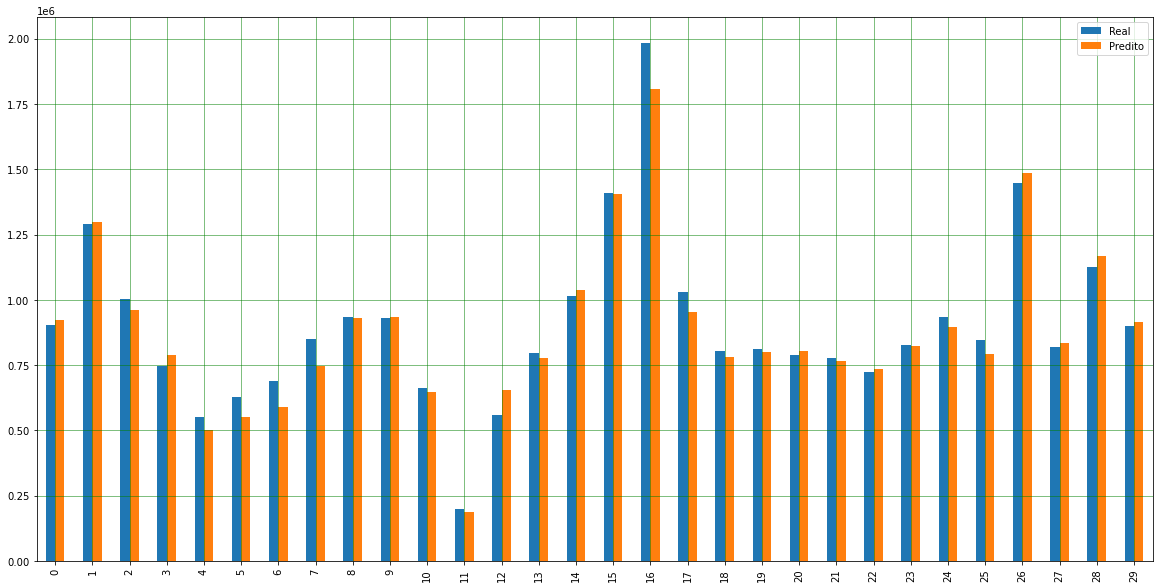

In [749]:
# Visualização das comparações

y_teste = np.asarray(y_teste)
y_pred = np.asarray(y_pred)
df1 = pd.DataFrame({'Real': y_teste.flatten(), 'Predito': y_pred.flatten()})

df1.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.gcf().set_size_inches(20, 10)

### Prevendo o faturamento de um novo registro

Aqui será possível que sejam feitos alguns testes com valores novos para o modelo. Será utilizado a biblioteca "ipywidgets" que permite uma certa interatividade na escolha dos valores

In [14]:
from ipywidgets import widgets, interact, interact_manual, FloatSlider

##### Entrando com o nome do bairro

In [15]:
# Criando a caixa
nome = widgets.Text()
input_text = widgets.Text()

input_text

Text(value='')

In [16]:
# Passando pra variáves
nome = input_text.value

print("O nome do novo bairro é: ", nome)

O nome do novo bairro é:  Bairro do Limoeiro


##### Entrando com as informações

In [17]:
# Definindo os campos e os sliders para preenchimento
accordion = widgets.Accordion(children=[widgets.FloatSlider(min = 0, max = 100000,step = 100), 
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 100000,step = 100),
                                        widgets.FloatSlider(min = 0, max = 1000000,step = 100)])

# Definindo os títulos
accordion.set_title(0,'População')
accordion.set_title(1,'População até 9 anos')
accordion.set_title(2,'População de 10 a 14 anos')
accordion.set_title(3,'População de 15 a 19 anos')
accordion.set_title(4,'População de 20 a 24 anos')
accordion.set_title(5,'População de 25 a 34 anos')
accordion.set_title(6,'População de 35 a 49 anos')
accordion.set_title(7,'População de 50 a 59 anos')
accordion.set_title(8,'População de mais de 60 anos')
accordion.set_title(9,'Domicílios Renda A1')
accordion.set_title(10,'Domicílios Renda A2')
accordion.set_title(11,'Domicílios Renda B1')
accordion.set_title(12,'Domicílios Renda B2')
accordion.set_title(13,'Domicílios Renda C1')
accordion.set_title(14,'Domicílios Renda C2')
accordion.set_title(15,'Domicílios Renda D')
accordion.set_title(16,'Domicílios Renda E')
accordion.set_title(17,'Renda Média')


                                     

accordion

Accordion(children=(FloatSlider(value=0.0, max=100000.0, step=100.0), FloatSlider(value=0.0, max=100000.0, ste…

In [839]:
# Colocando os valores em uma lista 
var = []
for i in range(len(accordion.children)):
    var.append(accordion.children[i].value)
var

[49800.0,
 5000.0,
 2700.0,
 3600.0,
 3600.0,
 7400.0,
 10000.0,
 6400.0,
 9300.0,
 0.0,
 700.0,
 900.0,
 2100.0,
 4400.0,
 4900.0,
 700.0,
 2500.0,
 1900.0]

In [840]:
# Passando para o formato de dataframe e fazendo a transposição
var = pd.DataFrame(var)
var = var.T
var

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,49800.0,5000.0,2700.0,3600.0,3600.0,7400.0,10000.0,6400.0,9300.0,0.0,700.0,900.0,2100.0,4400.0,4900.0,700.0,2500.0,1900.0


In [841]:
# Formato do registro
var.shape

(1, 18)

In [858]:
# Fazendo a previsão 

previsao = modelo.predict(var)
print("A previsão de faturamento para o " + nome + " é de "+ str(np.round(previsao[0],2)) + " reais")

A previsão de faturamento para o Bairro do Limoeiro é de 1019596.0 reais


### Observações finais

* Outros algoritmos poderiam ter sido utilizados, é claro, como as Redes Neurais Artificiais, com chance inclusive de terem alcançado resultados melhores. Escolhi utilizar esses por geralmente apresentarem resultados satisfatórios por serem do tipo "ensemble", isto é, combinarem a utilização de vários algoritmos a fim de fazerem os melhores ajustes possíveis para a diminuição das perdas. 

* Algumas células se encontram com a numeração fora de ordem pois, ao final, carreguei a base novamente para realizar outros testes, que acabei optando por não colocar na versão final (como a utilização do Pandas Profiling por exemplo).

* Caso nas células com os widgets apareça algum erro, favor rodas as células novamente que funcionará normalmente. 

* Outras ferrmamentas poderiam ter sido utilizadas como a linguagem R, por exemplo. Preferi fazer tudo em Python pois acho a interface do Jupyter Notebook mais amigável para a apresentação dos resultados. 


Obrigado pelo seu tempo! 

# Fim